# Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown "1XVuGQeBrr6f-rpMmw-Rr1_TbBbD9UUHd&confirm=t"
path = 'day.csv'
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## General Info Gathering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We see no missing values

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#We don't need instant
df.drop('instant', axis = 1, inplace = True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Converting date to datetime format
df['dteday'] = pd.DatetimeIndex(df.dteday)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [ ]:
df.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,2019-12-31,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


# Data Check + EDA

In [ ]:
# Check for any missing dates

pd.date_range(start = '2018-01-01', end = '2019-12-31').difference(df.dteday)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

No Missing Dates. i.e. The dataframe consists of total sales of each day in 2018 and 2019

In [ ]:
x = pd.DatetimeIndex(df.dteday).month - df.mnth
x.sum()

0

In [ ]:
df[['weekday', 'dteday']].head(10)

,weekday,dteday
0,1,2018-01-01
1,2,2018-02-01
2,3,2018-03-01
3,4,2018-04-01
4,5,2018-05-01
5,6,2018-06-01
6,0,2018-07-01
7,1,2018-08-01
8,2,2018-09-01
9,3,2018-10-01


- 1 -> Monday
- 2 -> Tuesday
- 3 -> Wednesday
- 4 -> Thursday
- 5 -> Friday
- 6 -> Saturday
- 0 -> Sunday

## Univariate Analysis

Variables such as dteday, season, yr, month, holiday, weekday, workingday tell us about the nature of the day, and as such do not need any data quality check. We've checked whether there are missing dates or not

We'll be using some of these for bivariate analysis

In [ ]:
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

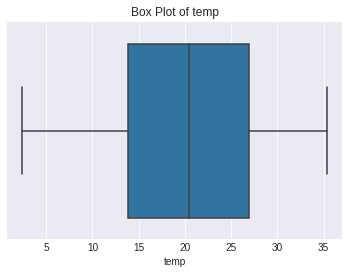

Description of temp
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64





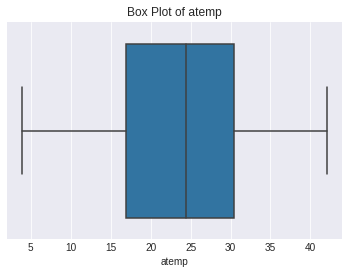

Description of atemp
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64





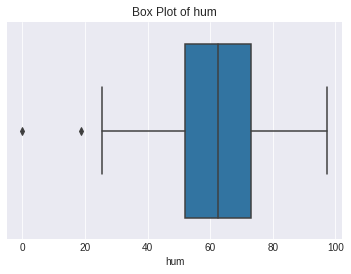

Description of hum
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64





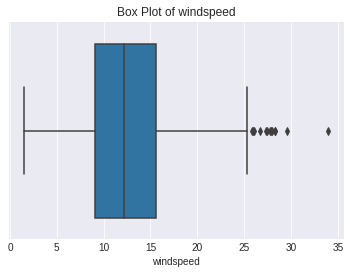

Description of windspeed
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64





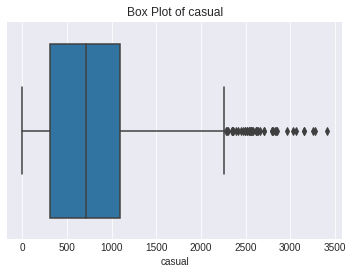

Description of casual
count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64





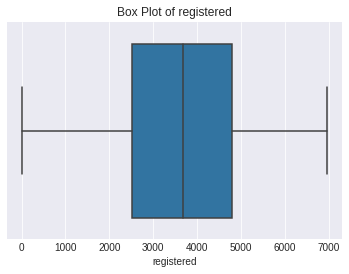

Description of registered
count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64





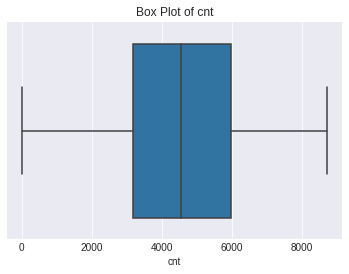

Description of cnt
count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64





In [ ]:
for i in numerical_variables:
    sns.boxplot(df[i])
    plt.title(f"Box Plot of {i}")
    plt.show()
    print(f"Description of {i}")
    print(df[i].describe())
    print('\n\n')

- Temperature and Atemp do not have any outliers and seem okay.
- Humidity has some values around 0 and some around 20. This is worth inspecting since humidity cannot be 0.
- Windspeed has some outliers - This could be worth inspecting
- Casual shows outliers, however, this variable is just a record of how many bikes were rented by casual users and thus does not need any treatment. 
- Using MinMaxScaler might affect this information and thus we'll use Standardization for scaling later on

In [ ]:
x = df[['temp', 'atemp', 'hum', 'windspeed']]
x.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


In [ ]:
x[x.hum <= 20]

,temp,atemp,hum,windspeed
49,16.365847,19.5702,18.7917,34.000021
68,15.952731,19.2834,0.0000,17.545759


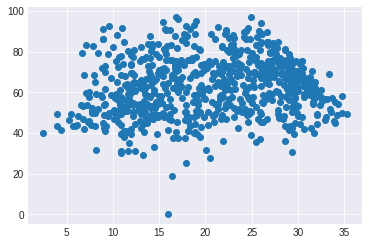

In [ ]:
plt.scatter(x.temp, x.hum)

We may need to impute this particular value

In [ ]:
x[(x.temp > 14) & (x.temp < 16) & (x.windspeed > 16) & (x.windspeed < 18)].hum.describe()

count     7.000000
mean     48.789343
std      25.118318
min       0.000000
25%      45.375000
50%      50.041700
75%      60.908500
max      78.916700
Name: hum, dtype: float64

We've filtered out values with similar conditions - temperature around 15 degrees C and windspeed around 17. We'll use the mean of 48 to impute our value

In [ ]:
df['hum'][df.hum == 0] = x[(x.temp > 14) & (x.temp < 16) & (x.windspeed > 16) & (x.windspeed < 18)].hum.mean()

In [ ]:
df['hum'][df.hum < 20]

49    18.7917
Name: hum, dtype: float64

Value of 18 for humidity is okay and does not need to be taken care of

In [ ]:
x[x.windspeed > 25]

,temp,atemp,hum,windspeed
44,17.015000,19.91750,37.5833,27.999836
49,16.365847,19.57020,18.7917,34.000021
93,23.506653,27.14645,42.6250,25.833257
94,16.980847,19.91750,64.2083,26.000489
238,27.880000,31.77780,85.0000,25.166339
292,19.509153,23.32625,63.6250,28.292425
377,11.240847,12.46810,50.7500,25.333236
382,12.436653,13.76270,44.3333,27.833743
407,5.227500,5.08290,46.4583,27.417204
420,11.924153,12.78375,39.5833,28.250014


These values seem okay as they are making sense

In [ ]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

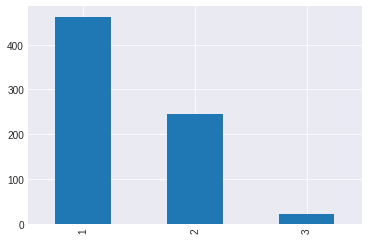

In [ ]:
df.weathersit.value_counts().plot.bar()

Data Dictionary says there'd be 4 different types of values in weathersit, however, we see only 3 types of values. This means that weather condition of 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' did not occur at all during these two years.

Since weathersit is an ordinal categorical variable, with 1 representing most clear weather and 3 being the worst, we will not be creating dummy variables for this as it could point to a linear relationship, with pleasant weather leading to more bike rentals and severe weather conditions leading to less bike rentals

In [ ]:
categorical_variables = ['weathersit', 'holiday', 'weekday', 'workingday', 'season', 'yr', 'mnth']

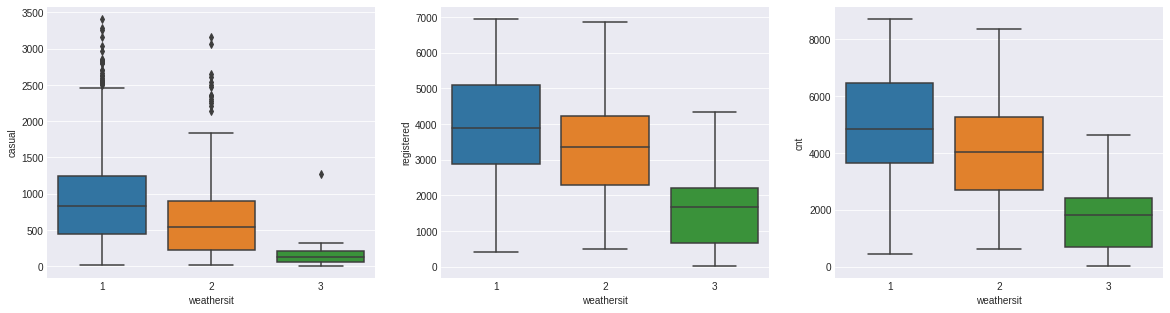

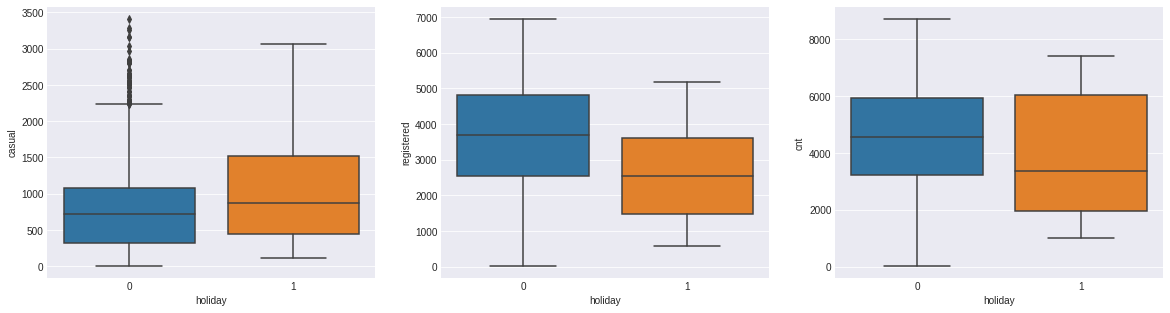

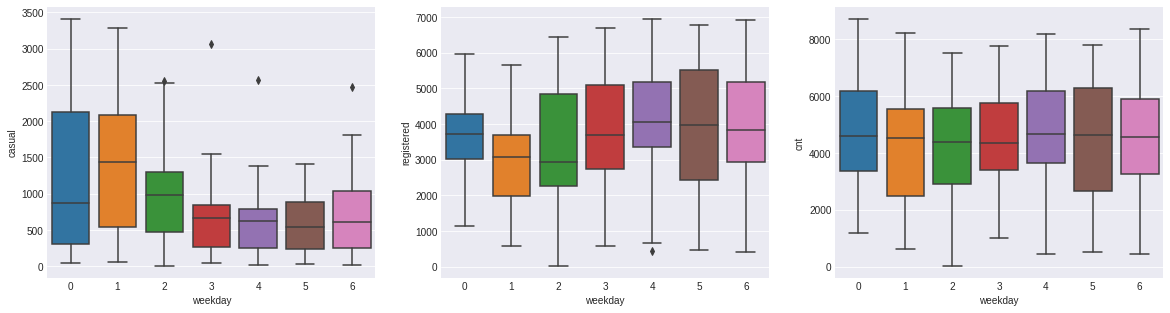

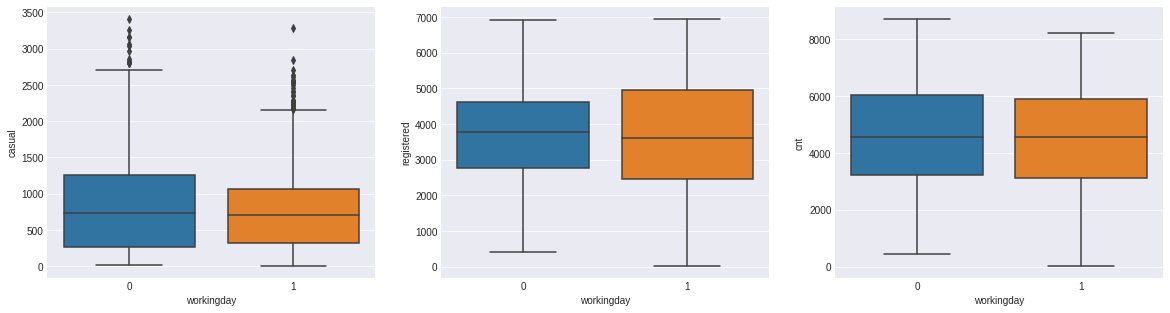

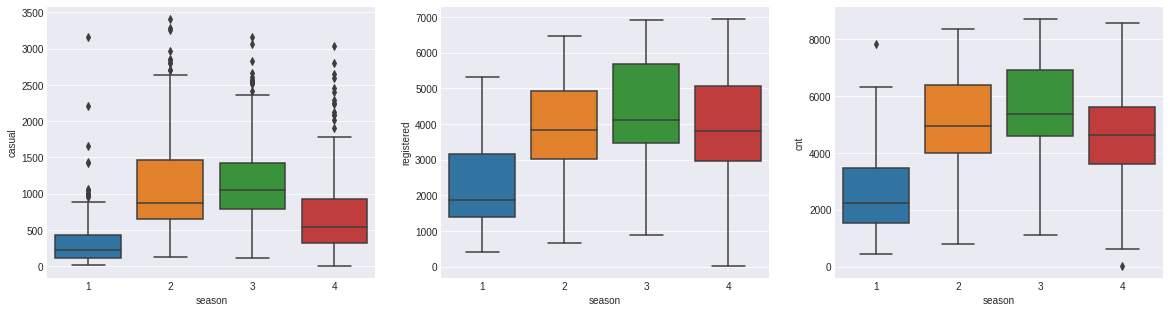

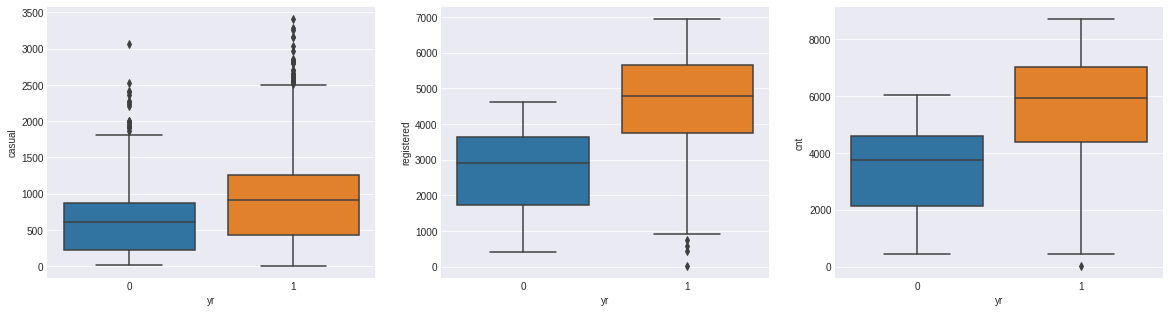

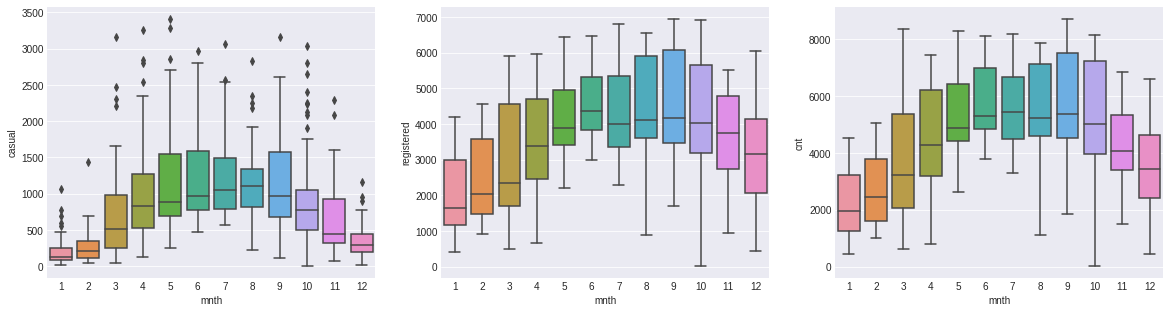

In [ ]:
for i in categorical_variables:
    plt.figure(figsize = (20, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(x = i, y = 'casual', data = df)
    plt.subplot(1, 3, 2)
    sns.boxplot(x = i, y = 'registered', data = df)
    plt.subplot(1, 3, 3)
    sns.boxplot(x = i, y = 'cnt', data = df)
    plt.show()

WEATHERSIT

we see a clear trend that more people rent bikes when weather is clear.

Generally we get more registered users than casual. On days when the weather is severe, we can still expect to see some registered users.

HOLIDAY

We see more casual users on holidays but less registered users. This is why the total count kind of varies.
This could possibly mean that registered users rent bikes to commute to work.

WEEKDAY

For casual users, trend varies a lot. more rentals on 
Monday, Tuesday. lesser on rest of the days.

For registered users there's not too much variation. Less rentals on monday, tuesday and more on rest of the days. This is why overall trend for count looks similar.

WORKINGDAY

Median seems similar for workingday. But the IQR looks bigger in casual for 0, i.e., more casual users rent bikes when it's not a working day.

IQR looks bigger in registered for 1, i.e., more registered users rent bikes when it's a working day.
Overall distribution looks similar work count.

SEASON

In general the trend seems similar for both casual and registered users. Less rentals in spring, more in summer and fall and slightly less in winters.

YR

we see more rentals in 2019 as compared to 2018. This could be because of the popularity of the company.

MNTH

Trend seems similar for casual and registered users. We see more rentals starting from months of may till october. This looks similar to season. We might not need this variable since season is a derived variable from month. However, we'll still create dummy variables and include it initially to see what comes out

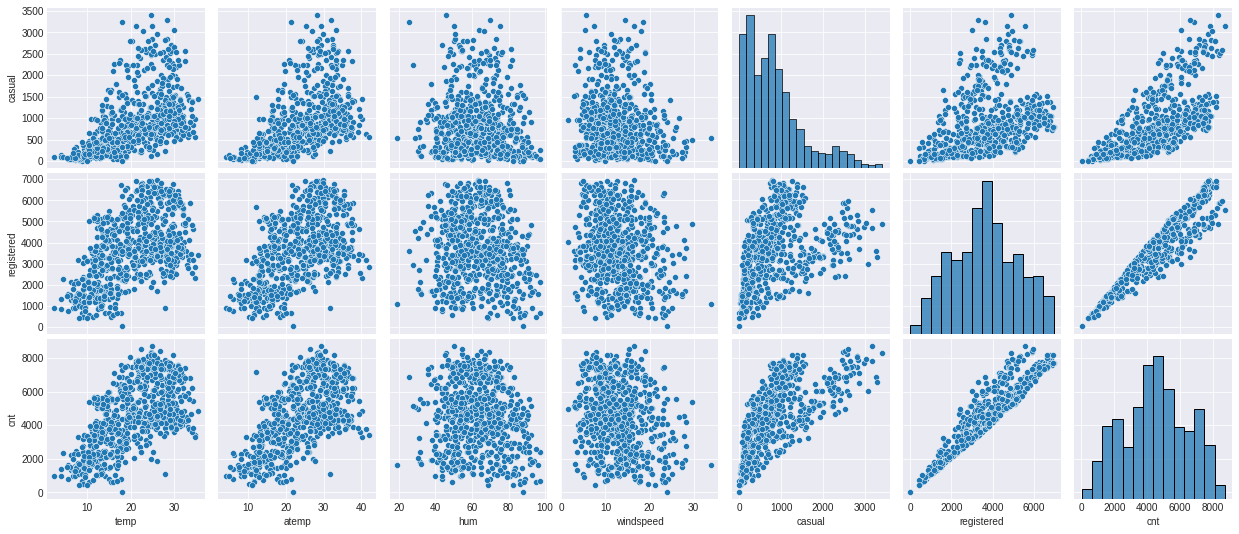

In [ ]:
sns.pairplot(df[numerical_variables], y_vars = ['casual', 'registered', 'cnt'])
plt.show()

At higher temperatures, we can still see higher rentals from registered users as opposed to casual users. This is similar for windspeed and humidity as well. This essentially means registered users are very regular.

# Model Building

## Data Preparation

In [ ]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


For Season, Month and Weekday we'll be creating dummy variables.

For weathersit, we won't create dummy variables since the data is categorical ordinal type and represents a sort of sequence.

We'll drop dteday as useful information (year, month, weekday) has already been extracted

In [ ]:
#Dropping dteday
df.drop('dteday', axis = 1, inplace = True)

In [ ]:
#Creating dummy variables for season
season = pd.get_dummies(df['season'])
season.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


We can drop the '4' column since

- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to fall
- 000 will correspond to winter

In [ ]:
season.drop(4, axis = 1, inplace = True)

In [ ]:
#Changing names of columns
season.columns = ['season_spring', 'season_summer', 'season_fall']
season.head()

,season_spring,season_summer,season_fall
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
#Adding results in original dataframe and removing the season variable since we don't need it now
df = pd.concat([df, season], axis = 1)
df.drop('season', axis = 1,  inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_fall
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [ ]:
# Creating dummy variable for month
month = pd.get_dummies(df['mnth'])
month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


We can drop the '12' column since

- 10000000000 will correspond to january
- 01000000000 will correspond to february
- 00100000000 will correspond to march
- 00010000000 will correspond to april
- 00001000000 will correspond to may
- 00000100000 will correspond to june
- 00000010000 will correspond to july
- 00000001000 will correspond to august
- 00000000100 will correspond to september
- 00000000010 will correspond to october
- 00000000001 will correspond to november
- 00000000000 will correspond to december

In [ ]:
#dropping the column 12
month.drop(12, axis = 1, inplace = True)
#Renaming the columns
month.columns = ['mnth_jan', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_june', 'mnth_july', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov']
month.head()

,mnth_jan,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_june,mnth_july,mnth_aug,mnth_sept,mnth_oct,mnth_nov
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Adding results in original dataframe and removing the mnth variable since we don't need it now
df = pd.concat([df, month], axis = 1)
df.drop('mnth', axis = 1,  inplace = True)
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_june,mnth_july,mnth_aug,mnth_sept,mnth_oct,mnth_nov
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating dummy variable for weekday
weekday = pd.get_dummies(df['weekday'])
weekday.head()

,0,1,2,3,4,5,6
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


We can drop the '6' column since

- 100000 will correspond to sunday
- 010000 will correspond to monday
- 001000 will correspond to tuesday
- 000100 will correspond to wednesday
- 000010 will correspond to thursday
- 000001 will correspond to friday
- 000000 will correspond to Saturday

In [ ]:
#dropping the column 6
weekday.drop(6, axis = 1, inplace = True)
#Renaming the columns
weekday.columns = ['wk_sun', 'wk_mon', 'wk_tue', 'wk_wed', 'wk_thu', 'wk_fri']
weekday.head()

,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [ ]:
#Adding results in original dataframe and removing the weekday variable since we don't need it now
df = pd.concat([df, weekday], axis = 1)
df.drop('weekday', axis = 1,  inplace = True)
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,mnth_aug,mnth_sept,mnth_oct,mnth_nov,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,1


## Splitting into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.shape

(510, 31)

In [ ]:
df_test.shape

(219, 31)

## Rescaling the Features

We'll use standard scaling since casual variable shows some outliers, i.e., points outside it's IQR. These points have some explanation and I'd like to include them as I'd be creating three linear regression models: one for casual, one for registered and one for cnt.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
numerical_variables = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [ ]:
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [ ]:
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,mnth_aug,mnth_sept,mnth_oct,mnth_nov,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df[numerical_variables].describe()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.394521,20.319259,23.726322,62.832010,12.763620,849.249315,3658.757534,4508.006849
std,0.544807,7.506729,8.150308,14.055905,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df_train[numerical_variables].describe()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02
mean,1.253899e-16,-2.385891e-16,4.231909e-16,1.741526e-16,-2.263984e-16,4.876274e-17,-9.926700e-17,-5.224579e-17
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00
min,-7.348426e-01,-2.381246e+00,-2.417741e+00,-3.200515e+00,-1.890981e+00,-1.237367e+00,-2.298498e+00,-2.289141e+00
25%,-7.348426e-01,-8.749555e-01,-8.526058e-01,-7.881345e-01,-7.167878e-01,-7.797647e-01,-7.477825e-01,-7.006213e-01
50%,-7.348426e-01,1.443562e-02,6.514277e-02,1.649432e-02,-1.415145e-01,-2.036895e-01,5.169022e-03,2.236523e-02
75%,1.093302e+00,8.773604e-01,8.269866e-01,7.235482e-01,5.522525e-01,3.535042e-01,7.551119e-01,7.625291e-01
max,2.921447e+00,2.050938e+00,2.295305e+00,2.437887e+00,4.004188e+00,3.621509e+00,2.088414e+00,2.167738e+00


## Building the Linear model

First, we'll build a model exclusively with cnt as the target variable.
We'll include all the other variables, except for casual and registered ofcourse.

In [ ]:
x_train = df_train.drop(['casual', 'registered', 'cnt'], axis = 1)
y_train = df_train['cnt']

In [ ]:
x_train.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_aug,mnth_sept,mnth_oct,mnth_nov,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
653,1,0,1,-0.734843,-0.121335,-0.055878,-0.531436,-0.117752,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,-0.734843,1.231731,1.194106,0.519389,-0.330615,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,1.093302,-0.420478,-0.348834,-0.078080,-0.385694,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,-0.734843,-1.294913,-1.473492,-1.071858,2.018143,1,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0,1.093302,-0.627580,-0.571474,-1.026823,-0.779889,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train.head()

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
Name: cnt, dtype: float64

In [ ]:
import statsmodels.api as sm
#Adding the constant
x_train = sm.add_constant(x_train)

In [ ]:
#Creating the model
lr_1 = sm.OLS(y_train, x_train).fit()

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     93.52
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          5.88e-175
Time:                        12:42:00   Log-Likelihood:                -248.55
No. Observations:                 510   AIC:                             555.1
Df Residuals:                     481   BIC:                             677.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2661      0.099     -2.685

## Removing Season Variables

In [ ]:
x_trains = x_train.drop(['season_spring', 'season_summer', 'season_fall'], axis = 1)
x_trains.head()

,const,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,mnth_jan,...,mnth_aug,mnth_sept,mnth_oct,mnth_nov,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
653,1.0,1,0,1,-0.734843,-0.121335,-0.055878,-0.531436,-0.117752,0,...,0,0,1,0,0,0,0,1,0,0
576,1.0,1,0,1,-0.734843,1.231731,1.194106,0.519389,-0.330615,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,1.093302,-0.420478,-0.348834,-0.078080,-0.385694,0,...,0,0,0,0,1,0,0,0,0,0
728,1.0,1,0,1,-0.734843,-1.294913,-1.473492,-1.071858,2.018143,0,...,0,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0,1.093302,-0.627580,-0.571474,-1.026823,-0.779889,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Creating the model
lrs_2 = sm.OLS(y_train, x_trains).fit()

In [ ]:
print(lrs_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     94.32
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.70e-168
Time:                        12:42:48   Log-Likelihood:                -272.26
No. Observations:                 510   AIC:                             596.5
Df Residuals:                     484   BIC:                             706.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4995      0.096     -5.208      0.0

## What if we remove all the month variables. Season variables are derived from month variables, thus it is worth inspecting

In [ ]:
x_train2 = x_train.drop(['mnth_jan', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_june', 'mnth_july', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov'], axis = 1)
x_train2.head()

,const,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,season_spring,season_summer,season_fall,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
653,1.0,1,0,1,-0.734843,-0.121335,-0.055878,-0.531436,-0.117752,0,0,0,0,0,0,1,0,0
576,1.0,1,0,1,-0.734843,1.231731,1.194106,0.519389,-0.330615,0,0,1,0,0,0,1,0,0
426,1.0,1,0,0,1.093302,-0.420478,-0.348834,-0.078080,-0.385694,1,0,0,1,0,0,0,0,0
728,1.0,1,0,1,-0.734843,-1.294913,-1.473492,-1.071858,2.018143,1,0,0,0,1,0,0,0,0
482,1.0,1,0,0,1.093302,-0.627580,-0.571474,-1.026823,-0.779889,0,1,0,1,0,0,0,0,0


In [ ]:
#Creating the model
lr_2 = sm.OLS(y_train, x_train2).fit()

In [ ]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.6
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          8.12e-174
Time:                        07:56:15   Log-Likelihood:                -278.97
No. Observations:                 510   AIC:                             593.9
Df Residuals:                     492   BIC:                             670.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1340      0.068     -1.964

Doing this reduces the R-squared to 0.825 from 0.845 - A slight decrease, however, it makes the model a lot simpler to understand.

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train2.columns
vif['VIF'] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,64.96
5,temp,58.26
6,atemp,53.86
13,wk_mon,42.13
14,wk_tue,41.28
17,wk_fri,40.37
16,wk_thu,39.65
15,wk_wed,36.68
0,const,13.09
2,holiday,6.61


We'll drop working day first. Trends differ for each day and working day can be explained by weekday variables - Thus we'll drop it and see if the p-value changes for variables like wk_sunday, wk_monday

In [ ]:
x_train3 = x_train2.drop('workingday', axis = 1)
x_train3.head()

,const,yr,holiday,weathersit,temp,atemp,hum,windspeed,season_spring,season_summer,season_fall,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
653,1.0,1,0,-0.734843,-0.121335,-0.055878,-0.531436,-0.117752,0,0,0,0,0,0,1,0,0
576,1.0,1,0,-0.734843,1.231731,1.194106,0.519389,-0.330615,0,0,1,0,0,0,1,0,0
426,1.0,1,0,1.093302,-0.420478,-0.348834,-0.078080,-0.385694,1,0,0,1,0,0,0,0,0
728,1.0,1,0,-0.734843,-1.294913,-1.473492,-1.071858,2.018143,1,0,0,0,1,0,0,0,0
482,1.0,1,0,1.093302,-0.627580,-0.571474,-1.026823,-0.779889,0,1,0,1,0,0,0,0,0


In [ ]:
lr_3 = sm.OLS(y_train, x_train3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          1.22e-174
Time:                        07:56:16   Log-Likelihood:                -279.61
No. Observations:                 510   AIC:                             593.2
Df Residuals:                     493   BIC:                             665.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1443      0.068     -2.136

R-squared and adjusted R-squared have stayed the same. P-value of variables have changed. We'll try dropping atemp first as well since it is correlated to temp. Then we'll work on the rest of the variables with higher p values

In [ ]:
x_train4 = x_train3.drop('atemp', axis = 1)
x_train4.head()

,const,yr,holiday,weathersit,temp,hum,windspeed,season_spring,season_summer,season_fall,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
653,1.0,1,0,-0.734843,-0.121335,-0.531436,-0.117752,0,0,0,0,0,0,1,0,0
576,1.0,1,0,-0.734843,1.231731,0.519389,-0.330615,0,0,1,0,0,0,1,0,0
426,1.0,1,0,1.093302,-0.420478,-0.078080,-0.385694,1,0,0,1,0,0,0,0,0
728,1.0,1,0,-0.734843,-1.294913,-1.071858,2.018143,1,0,0,0,1,0,0,0,0
482,1.0,1,0,1.093302,-0.627580,-1.026823,-0.779889,0,1,0,1,0,0,0,0,0


In [ ]:
lr_4 = sm.OLS(y_train, x_train4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          1.11e-175
Time:                        07:56:16   Log-Likelihood:                -279.76
No. Observations:                 510   AIC:                             591.5
Df Residuals:                     494   BIC:                             659.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1439      0.068     -2.131

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train4.columns
vif['VIF'] = [variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,12.84
4,temp,3.55
9,season_fall,3.24
5,hum,2.03
11,wk_mon,1.87
12,wk_tue,1.87
7,season_spring,1.83
8,season_summer,1.83
14,wk_thu,1.83
15,wk_fri,1.83


VIF for all variables is below 5. This means all the variables we have are independent. We just have to tweak these with respect to their significance, i.e., p-values

x_train4 is the set we can use to further inspect registered and casual variables as well

In [ ]:
x_train5 = x_train4.drop('wk_thu', axis = 1)
x_train5.head()

,const,yr,holiday,weathersit,temp,hum,windspeed,season_spring,season_summer,season_fall,wk_sun,wk_mon,wk_tue,wk_wed,wk_fri
653,1.0,1,0,-0.734843,-0.121335,-0.531436,-0.117752,0,0,0,0,0,0,1,0
576,1.0,1,0,-0.734843,1.231731,0.519389,-0.330615,0,0,1,0,0,0,1,0
426,1.0,1,0,1.093302,-0.420478,-0.078080,-0.385694,1,0,0,1,0,0,0,0
728,1.0,1,0,-0.734843,-1.294913,-1.071858,2.018143,1,0,0,0,1,0,0,0
482,1.0,1,0,1.093302,-0.627580,-1.026823,-0.779889,0,1,0,1,0,0,0,0


In [ ]:
lr_5 = sm.OLS(y_train, x_train5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          8.49e-177
Time:                        07:56:16   Log-Likelihood:                -279.76
No. Observations:                 510   AIC:                             589.5
Df Residuals:                     495   BIC:                             653.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1403      0.056     -2.488

Adjusted R-squared has increased to 0.820. Let's drop wk_sun now

In [ ]:
x_train6 = x_train5.drop('wk_sun', axis = 1)
lr_6 = sm.OLS(y_train, x_train6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.3
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          7.00e-178
Time:                        07:56:16   Log-Likelihood:                -279.89
No. Observations:                 510   AIC:                             587.8
Df Residuals:                     496   BIC:                             647.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1302      0.052     -2.484

Dropping wk_fri now

In [ ]:
x_train7 = x_train6.drop('wk_fri', axis = 1)
lr_7 = sm.OLS(y_train, x_train7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.3
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          6.59e-179
Time:                        07:56:16   Log-Likelihood:                -280.19
No. Observations:                 510   AIC:                             586.4
Df Residuals:                     497   BIC:                             641.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1424      0.050     -2.852

Dropping wk_wed now -> The only variable left with p value less than 0.05

In [ ]:
x_train8 = x_train7.drop('wk_wed', axis = 1)
lr_8 = sm.OLS(y_train, x_train8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          7.84e-180
Time:                        07:56:16   Log-Likelihood:                -280.78
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     498   BIC:                             636.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1546      0.049     -3.180

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train8.columns
vif['VIF'] = [variance_inflation_factor(x_train8.values, i) for i in range(x_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.69
4,temp,3.55
9,season_fall,3.23
5,hum,2.02
8,season_summer,1.83
7,season_spring,1.82
3,weathersit,1.80
6,windspeed,1.20
10,wk_mon,1.05
11,wk_tue,1.05


VIF values less than 5 and p-values less than 0.05. We now have our final model

### Making Model for casual

In [ ]:
y_train_casual = df_train['casual']
y_train_casual.head()

653    0.125073
576    0.193195
426    0.175424
728   -0.701276
482    0.418294
Name: casual, dtype: float64

In [ ]:
lr_casual1 = sm.OLS( y_train_casual, x_train4).fit()
print(lr_casual1.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     55.17
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.83e-95
Time:                        07:56:16   Log-Likelihood:                -472.73
No. Observations:                 510   AIC:                             977.5
Df Residuals:                     494   BIC:                             1045.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3851      0.099     -3.907

This is interesting. wk_sun is an important variable for casual rides, while wk_wed and wk_fri are not. Although wednesday and friday are still relatively more important for casual as compared to registered

In [ ]:
x_train_casual = x_train4.drop(['wk_wed'], axis = 1)
lr_casual2 = sm.OLS( y_train_casual, x_train_casual).fit()
print(lr_casual2.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     58.89
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           8.71e-96
Time:                        07:56:16   Log-Likelihood:                -473.66
No. Observations:                 510   AIC:                             977.3
Df Residuals:                     495   BIC:                             1041.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4573      0.083     -5.538

In [ ]:
#Dropping wk_fri
x_train_casual1 = x_train_casual.drop(['wk_fri'], axis = 1)
lr_casual3 = sm.OLS( y_train_casual, x_train_casual1).fit()
print(lr_casual3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     63.40
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        07:56:16   Log-Likelihood:                -474.03
No. Observations:                 510   AIC:                             976.1
Df Residuals:                     496   BIC:                             1035.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4850      0.076     -6.399

### Making a model for Registered

In [ ]:
y_train_registered = df_train['registered']
y_train_registered.head()

653    1.876859
576    1.646303
426   -0.341300
728   -1.404141
482   -0.347634
Name: registered, dtype: float64

In [ ]:
lr_registered1 = sm.OLS( y_train_registered, x_train4).fit()
print(lr_registered1.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     143.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          3.71e-169
Time:                        07:56:16   Log-Likelihood:                -295.36
No. Observations:                 510   AIC:                             622.7
Df Residuals:                     494   BIC:                             690.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0130      0.070     -0.187

wk_sun is significant here as well. wk_wed, wk_thu and wk_fri are not. We followed the same steps for casual, thus we'll use those variables

In [ ]:
lr_registered2 = sm.OLS( y_train_registered, x_train_casual).fit()
print(lr_registered2.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.97e-170
Time:                        07:56:16   Log-Likelihood:                -295.37
No. Observations:                 510   AIC:                             620.7
Df Residuals:                     495   BIC:                             684.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0193      0.058     -0.332

Dropping wk_fri now

In [ ]:
lr_registered3 = sm.OLS( y_train_registered, x_train_casual1).fit()
print(lr_registered3.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     166.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.57e-171
Time:                        07:56:16   Log-Likelihood:                -295.51
No. Observations:                 510   AIC:                             619.0
Df Residuals:                     496   BIC:                             678.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0075      0.053     -0.140

What if we used the same on cnt?

In [ ]:
lr_9 = sm.OLS( y_train, x_train_casual1).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          8.62e-178
Time:                        07:56:16   Log-Likelihood:                -280.10
No. Observations:                 510   AIC:                             588.2
Df Residuals:                     496   BIC:                             647.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1740      0.052     -3.357

In [ ]:
#Our original model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          7.84e-180
Time:                        07:56:16   Log-Likelihood:                -280.78
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     498   BIC:                             636.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1546      0.049     -3.180

While wk_sun and wk_thu are significant for predicting registered and casual seperately, for predicting cnt they're not as significant.

# Residual Analysis of Train Data:

## Final Models:

In [ ]:
#Model for Count
#lr_8 = sm.OLS(y_train, x_train8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          7.84e-180
Time:                        07:56:16   Log-Likelihood:                -280.78
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     498   BIC:                             636.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1546      0.049     -3.180

In [ ]:
#Model for Registered
#lr_registered3 = sm.OLS( y_train_registered, x_train_casual1).fit()
print(lr_registered3.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     166.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.57e-171
Time:                        07:56:16   Log-Likelihood:                -295.51
No. Observations:                 510   AIC:                             619.0
Df Residuals:                     496   BIC:                             678.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0075      0.053     -0.140

In [ ]:
#Model for Casual
#lr_casual3 = sm.OLS( y_train_casual, x_train_casual1).fit()
print(lr_casual3.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     63.40
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.53e-96
Time:                        07:56:16   Log-Likelihood:                -474.03
No. Observations:                 510   AIC:                             976.1
Df Residuals:                     496   BIC:                             1035.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4850      0.076     -6.399

## Residual Analysis: Count Model

In [ ]:
y_train_cnt = lr_8.predict(x_train8)

Text(0.5, 0, 'Errors')

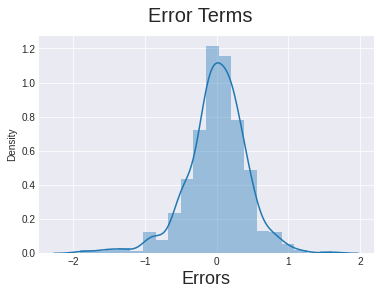

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It is a normal Distribution

## Residual Analysis: Casual Model:

In [ ]:
y_train_casual_pred = lr_casual3.predict(x_train_casual1)

Text(0.5, 0, 'Errors')

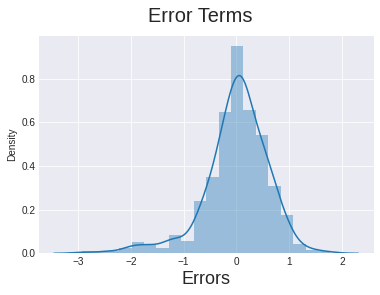

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_casual_pred - y_train_casual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Residual Analysis: Registered Model:

In [ ]:
y_train_registered_pred = lr_registered3.predict(x_train_casual1)

Text(0.5, 0, 'Errors')

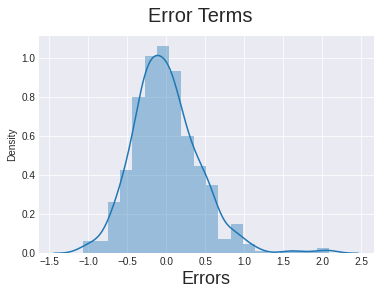

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_registered_pred - y_train_registered), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Model Evaluation:

## Applying Scaling on test sets:

In [ ]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.describe()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,mnth_aug,mnth_sept,mnth_oct,mnth_nov,wk_sun,wk_mon,wk_tue,wk_wed,wk_thu,wk_fri
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,-0.050332,0.096083,0.094272,-0.089833,-0.043731,0.056904,0.014045,...,0.059361,0.086758,0.082192,0.073059,0.155251,0.118721,0.123288,0.155251,0.141553,0.132420
std,0.500722,0.188034,0.481313,0.985084,1.035793,1.026916,1.041693,0.942916,1.055571,0.956001,...,0.236840,0.282125,0.275286,0.260830,0.362974,0.324202,0.329520,0.362974,0.349389,0.339723
min,0.000000,0.000000,0.000000,-0.734843,-2.174744,-2.295437,-2.723142,-2.143341,-1.227001,-2.037539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.734843,-0.809372,-0.792914,-0.867694,-0.720691,-0.742001,-0.722922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.734843,0.094973,0.170654,-0.165145,-0.125622,-0.150377,0.011503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.093302,0.983209,0.947998,0.647314,0.485055,0.521958,0.617665,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.921447,1.981904,2.205446,2.452897,2.869216,3.809585,2.023808,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into x_test and y_test for all three models

In [ ]:
y_test_cnt = df_test['cnt']
y_test_casual = df_test['casual']
y_test_registered = df_test['registered']

In [ ]:
df_test = sm.add_constant(df_test)

In [ ]:
x_test_cnt = df_test[x_train8.columns]
x_test_casreg = df_test[x_train_casual1.columns]

In [ ]:
x_test_cnt.head()

,const,yr,holiday,weathersit,temp,hum,windspeed,season_spring,season_summer,season_fall,wk_mon,wk_tue
184,1.0,0,1,1.093302,1.305371,0.042017,-1.394498,0,0,1,0,0
535,1.0,1,0,-0.734843,1.613721,-0.288246,-0.984730,0,1,0,0,0
299,1.0,0,0,1.093302,-0.112129,1.303001,0.079219,0,0,0,0,0
221,1.0,0,0,-0.734843,1.526280,-1.498186,0.110839,0,0,1,0,0
152,1.0,0,0,-0.734843,1.240938,-2.356859,1.277165,0,1,0,0,0


In [ ]:
x_test_casreg.head()

,const,yr,holiday,weathersit,temp,hum,windspeed,season_spring,season_summer,season_fall,wk_sun,wk_mon,wk_tue,wk_thu
184,1.0,0,1,1.093302,1.305371,0.042017,-1.394498,0,0,1,0,0,0,0
535,1.0,1,0,-0.734843,1.613721,-0.288246,-0.984730,0,1,0,0,0,0,1
299,1.0,0,0,1.093302,-0.112129,1.303001,0.079219,0,0,0,0,0,0,0
221,1.0,0,0,-0.734843,1.526280,-1.498186,0.110839,0,0,1,0,0,0,0
152,1.0,0,0,-0.734843,1.240938,-2.356859,1.277165,0,1,0,0,0,0,0


## Predicting Values:

In [ ]:
y_pred_cnt = lr_8.predict(x_test_cnt)

In [ ]:
y_pred_casual = lr_casual3.predict(x_test_casreg)

In [ ]:
y_pred_registered = lr_registered3.predict(x_test_casreg)

## Calculating R-Squared

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#Count
r2_score(y_true = y_test_cnt, y_pred = y_pred_cnt)

0.8062855981978334

Text(0, 0.5, 'y_pred_cnt')

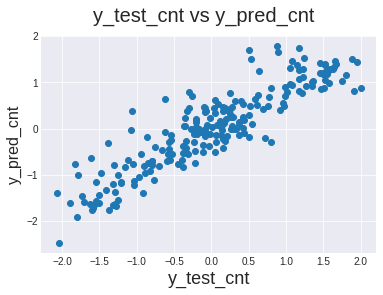

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_cnt, y_pred_cnt)
fig.suptitle('y_test_cnt vs y_pred_cnt', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_cnt', fontsize = 18)                          # X-label
plt.ylabel('y_pred_cnt', fontsize = 16)      

In [ ]:
#Casual
r2_score(y_true = y_test_casual, y_pred = y_pred_casual)

0.5912666472319661

Text(0, 0.5, 'y_pred_casual')

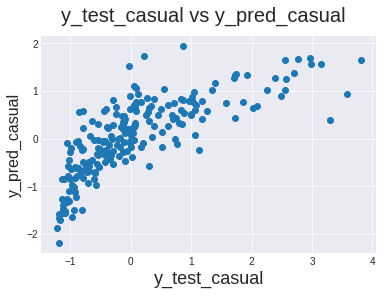

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_casual, y_pred_casual)
fig.suptitle('y_test_casual vs y_pred_casual', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_casual', fontsize = 18)                          # X-label
plt.ylabel('y_pred_casual', fontsize = 16)      

In [ ]:
#Registered
r2_score(y_true = y_test_registered, y_pred = y_pred_registered)

0.7917283326745899

Text(0, 0.5, 'y_pred_registered')

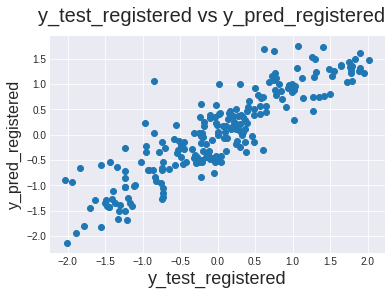

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_registered, y_pred_registered)
fig.suptitle('y_test_registered vs y_pred_registered', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_registered', fontsize = 18)                          # X-label
plt.ylabel('y_pred_registered', fontsize = 16)      

# Comparing the Beta Coefficients

In [ ]:
round(lr_8.params.sort_values(ascending = False))

yr               1.0
temp             0.0
hum             -0.0
wk_tue          -0.0
wk_mon          -0.0
windspeed       -0.0
const           -0.0
weathersit      -0.0
season_summer   -0.0
season_fall     -0.0
holiday         -0.0
season_spring   -1.0
dtype: float64

In [ ]:
beta = pd.DataFrame(round(lr_8.params.sort_values(ascending = False), 2))

In [ ]:
round(lr_casual3.params.sort_values(ascending = False), 2)

wk_mon           1.13
wk_sun           0.82
temp             0.53
wk_tue           0.46
yr               0.39
holiday          0.37
season_summer    0.22
hum             -0.07
wk_thu          -0.13
weathersit      -0.13
windspeed       -0.14
season_fall     -0.23
season_spring   -0.23
const           -0.49
dtype: float64

In [ ]:
beta = beta.merge(pd.DataFrame(round(lr_casual3.params.sort_values(ascending = False), 2)), how = 'outer', left_index = True, right_index = True)

In [ ]:
round(lr_registered3.params.sort_values(ascending = False), 2)

yr               1.11
temp             0.39
wk_thu           0.10
const           -0.01
hum             -0.08
windspeed       -0.12
weathersit      -0.17
wk_sun          -0.27
wk_tue          -0.33
season_summer   -0.33
season_fall     -0.38
wk_mon          -0.62
holiday         -0.63
season_spring   -0.78
dtype: float64

In [ ]:
beta = beta.merge(pd.DataFrame(round(lr_registered3.params.sort_values(ascending = False), 2)), how = 'outer', left_index = True, right_index = True)

In [ ]:
beta.columns = ['Cnt', 'Casual', 'Registered']
beta.head()

,Cnt,Casual,Registered
const,-0.15,-0.49,-0.01
holiday,-0.40,0.37,-0.63
hum,-0.09,-0.07,-0.08
season_fall,-0.39,-0.23,-0.38
season_spring,-0.71,-0.23,-0.78


In [ ]:
beta = beta.transpose()

In [ ]:
beta

,const,holiday,hum,season_fall,season_spring,season_summer,temp,weathersit,windspeed,wk_mon,wk_sun,wk_thu,wk_tue,yr
Cnt,-0.15,-0.40,-0.09,-0.39,-0.71,-0.19,0.49,-0.18,-0.14,-0.13,NaN,NaN,-0.13,1.03
Casual,-0.49,0.37,-0.07,-0.23,-0.23,0.22,0.53,-0.13,-0.14,1.13,0.82,-0.13,0.46,0.39
Registered,-0.01,-0.63,-0.08,-0.38,-0.78,-0.33,0.39,-0.17,-0.12,-0.62,-0.27,0.10,-0.33,1.11
